#### pandas 내장 그래프 도구
- 판다스는 matplolib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있다
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대 그래프 : df.plot(kind = 'bar'), df.plot(kind = bar', stacked = True, alpha = 0.8)
- 히스토그램 : df.plot(kind = 'hist')
- 산점도 : df.plot(x = '', y = '', kind = 'scatter') - 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind = 'box'), df.boxplot(column = ['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins = )
- line plot : plt.plot(x, y)
- plt.bar(x, y, color = '')
- scatter plot : plt.scatter(x, y)

#### seaborn
- sns.distplot(data, bins = , color = , kde = )
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.joinplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x, y, data, color)
- sns.regplot(x, y, data, fig_reg = False)
# 

https://seaborn.pydata.org/api.html

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [50]:
# Date를 datetime으로 변경한 후 인덱스로 변환

from datetime import datetime

df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volume'], axis = 1, inplace = True)
df1

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700
2018-06-25,11150,11400,11450,11000
2018-06-22,11300,11250,11450,10750
2018-06-21,11200,11350,11750,11200
2018-06-20,11550,11200,11600,10900


<AxesSubplot:xlabel='Date'>

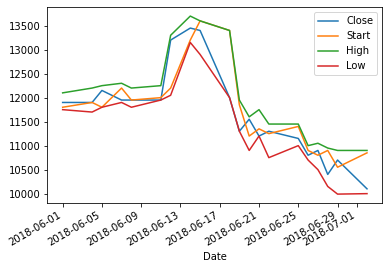

In [68]:
# 선 그래프

df1.plot()

<AxesSubplot:xlabel='Date'>

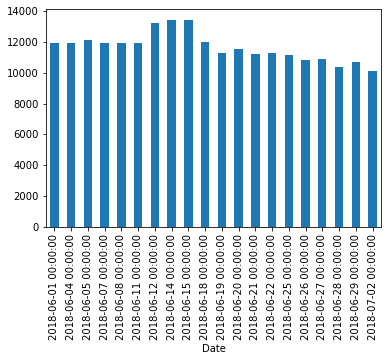

In [67]:
# 바 그래프

df2 = df1.sort_index()
df2.Close.plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

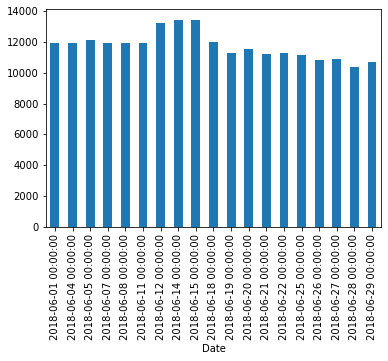

In [78]:
# df1.loc[df1.Date.dt.month == 6].Close.plot(kind = 'bar')
df2.loc['2018-06'].Close.plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

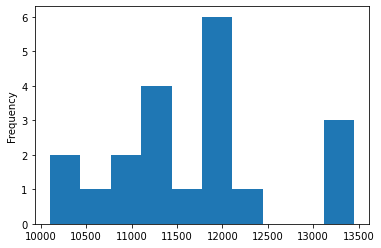

In [82]:
df2.Close.plot(kind = 'hist')

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

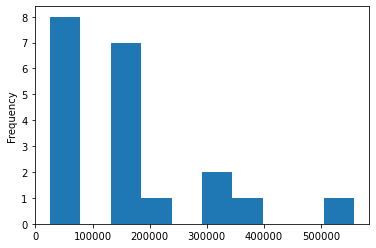

In [89]:
df.Volume.plot(kind = 'hist')
display(df.Volume.describe())

<AxesSubplot:xlabel='Volume', ylabel='Count'>

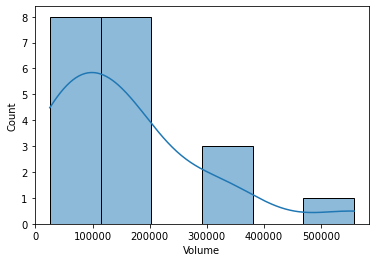

In [92]:
import seaborn as sns
sns.histplot(df.Volume, kde = True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

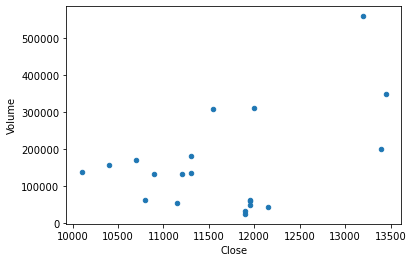

In [94]:
# 산점도

df.plot(x = 'Close', y = 'Volume', kind = 'scatter')

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

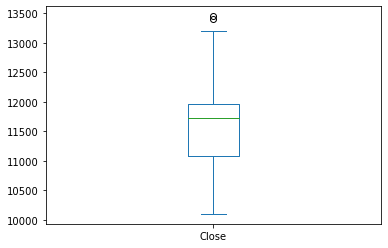

In [99]:
# Box Plot

display(df.Close.describe())
df.Close.plot(kind = 'box')

#### Box plot 의미 해석

- IQR(iiter Quartile Range) : 제 3사분위수(Q3) - 제 1사분위수(Q1)
    
- lower whisker : Q1 - 1.5 * IQR 이내인 값 중에서 최소갑
- upper whisker : Q3 + 1.5 * IQR 이내인 값 중에서 최대값
- 이상치 : lower, whisker, upper whisker를 벗어나는 값

In [112]:
# Close 칼럼의 이상치를 구하세요

display(df.Close.describe())

Q1 = df.Close.quantile(0.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
uw_check = Q3 + 1.5 * IQR
print(df.Close.sort_values(ascending = False)[:5], '\n')
print('uw 13200을 벗어나는 값 선택:')
df.Close.loc[df.Close > Q3 + 1.5 * IQR]

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 

uw 13200을 벗어나는 값 선택:


11    13400
12    13450
Name: Close, dtype: int64

(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

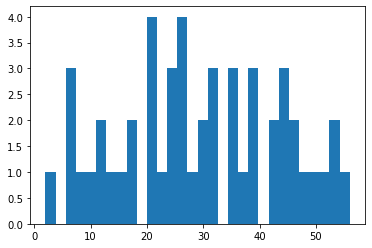

In [129]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.arange(50) + np.random.randint(1, 10, size = 50)

plt.hist(data, bins = 30)

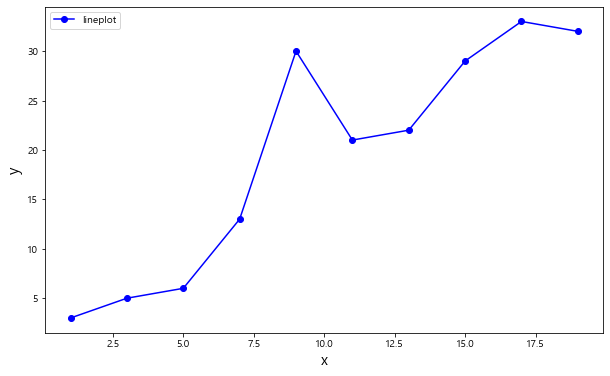

In [332]:
x = np.arange(1, 21, 2)
y = np.array([3, 5, 6, 13, 30, 21, 22, 29, 33, 32])

plt.figure(figsize = (10, 6))
plt.plot(x, y, color = 'blue', marker = 'o', markersize = 6)
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.legend(labels = ['lineplot'])

Text(0.5, 1.0, 'Line Graph')

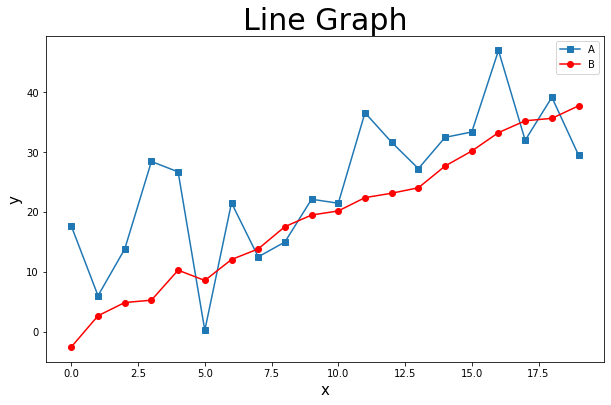

In [177]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20) * 2 + np.random.randn(20) * 10
y2 = np.arange(20) * 2 + np.random.randn(20)

plt.figure(figsize = (10, 6))
plt.plot(x, y1, marker = 's')
plt.plot(x, y2, color = 'red', marker = 'o', markersize = 6)
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.legend(labels = ['A', 'B'])
plt.title('Line Graph', size = 30)

Text(0, 0.5, 'Y')

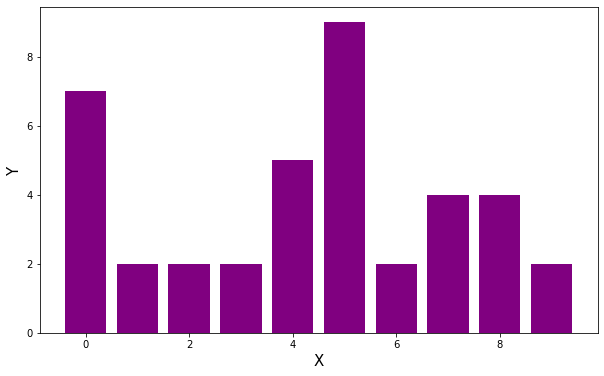

In [189]:
# 막대그래프

y = np.random.randint(2, 10, size = 10)
x = range(len(y))
plt.figure(figsize = (10, 6))
plt.bar(x, y, width = 0.8, color = 'purple')
plt.xlabel('X', size = 15)
plt.ylabel('Y', size = 15)

In [204]:
df = pd.read_csv('movie.csv')
df

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466
5,20180220,6,NEW,20179985,코코,56664400,7967


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

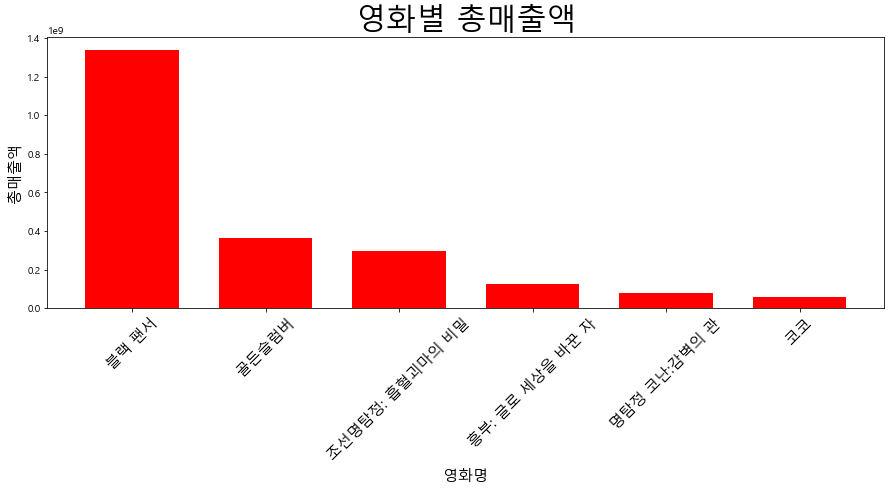

In [218]:
# movie.csv에서 x축 movieNm, y축 salesAmt로 막대그래프를 그리세요

plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

plt.figure(figsize = (15, 5))
plt.bar(df.movieNm, df.salesAmt, width = 0.7, color = 'red')
plt.title('영화별 총매출액', size = 30)
plt.xlabel('영화명', size = 15)
plt.ylabel('총매출액', size = 15)
plt.xticks(rotation = 45, size = 15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Text(0, 0.5, 'weight')

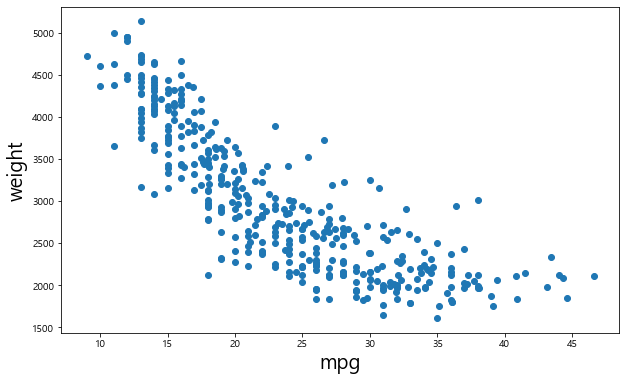

In [247]:
# scatter plot

df_auto = pd.read_excel('auto-mpg.xlsx', engine = 'openpyxl')
display(df_auto)

x = df_auto.mpg
y = df_auto['weight']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)
plt.xlabel('mpg', size = 20)
plt.ylabel('weight', size = 20)

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

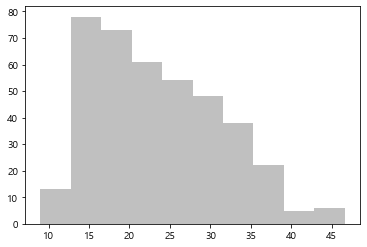

In [250]:
# histogram

plt.hist(x, bins = 10, color = 'silver')

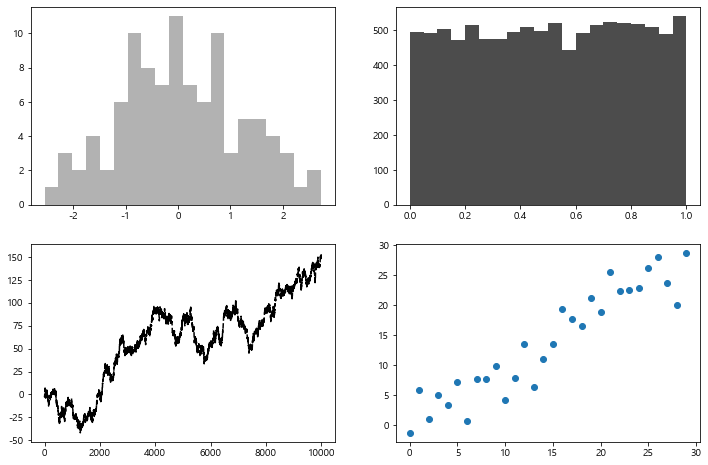

In [278]:
fig = plt.figure(figsize = (12, 8))

# figure가 2 * 2 크기이고 4개의 서브플롯

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)                     
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.rand(10000), bins = 20, color = 'k', alpha = 0.7)
ax3.plot(np.random.randn(10000).cumsum(), 'k--')
ax4.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

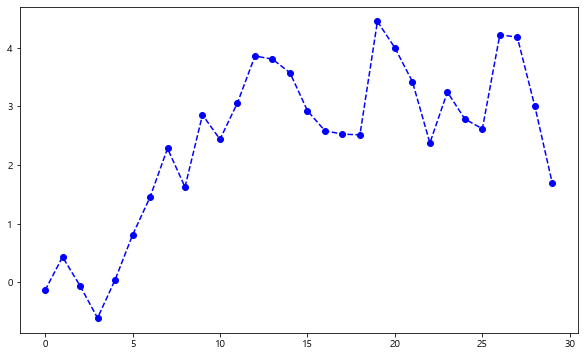

In [282]:
from numpy.random import randn

plt.figure(figsize = (10, 6))
plt.plot(randn(30).cumsum(), linestyle = 'dashed', color = 'b', marker = 'o')

In [285]:
t3 = pd.read_csv('titanic3.csv')
t3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [330]:
# t3에서 age열로 범주화한 후 age_cat 열을 추가하세요

def cat(age):
    cat = ''
    if age < 10: cat = '0s'
    elif age < 20: cat = '10s'
    elif age < 30: cat = '20s'
    elif age < 40: cat = '30s'
    elif age < 50: cat = '40s'
    elif age < 60: cat = '50s'
    elif age < 70: cat = '60s'
    elif age < 80: cat = '70s'
    elif age < 90: cat = '80s'
    return cat

t3['age_cat'] = t3.age.apply(cat)

# t3['age'].loc[t3['age'] >= 80]

         pclass  survived      age  sibsp  parch       fare    body  Ratio
age_cat                                                                   
            695        73     0.00    127     64  5213.5330   153.0    263
0s          216        50   330.17    135    114  2403.4248     4.0     82
10s         356        56  2380.00    105     69  4534.9836  1982.0    143
20s         838       127  8402.00    112     77  9198.3038  5125.0    344
30s         488        98  7855.50     80     73  9578.5332  5020.0    232
40s         250        52  5958.50     50     68  5723.5168  3429.0    135
50s         101        32  3751.50     29     21  4384.9541  1889.0     70
60s          47        10  1995.50     13     17  2223.2042  1394.0     32
70s          12         1   502.50      2      1   260.0334   462.0      7
80s           1         1    80.00      0      0    30.0000     0.0      1


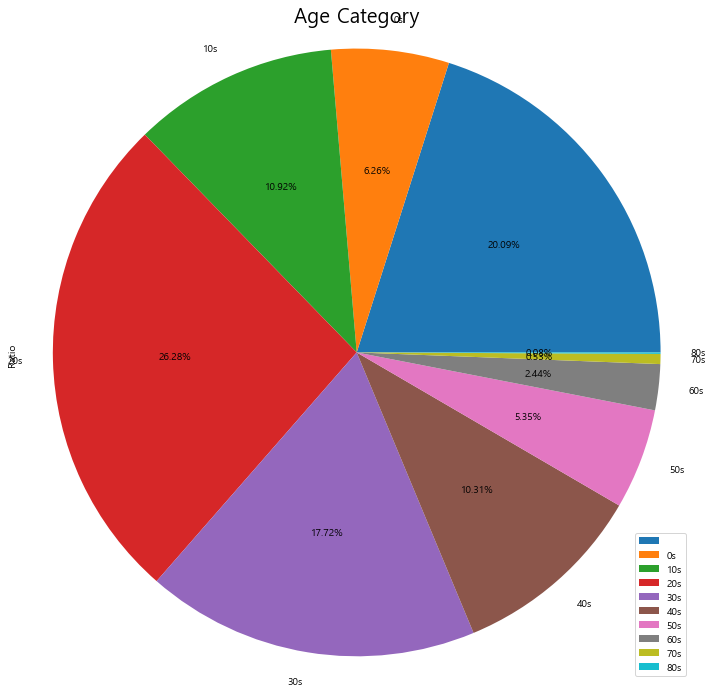

In [331]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat)

df_age_cat.Ratio.plot(kind = 'pie',
                      figsize = (12, 12),
                      autopct = '%.2f%%',
                      startangle = 0)

plt.title('Age Category', size = 20)
plt.axis('equal')
plt.legend(labels = df_age_cat.index, loc = 'best')